(HW2)=
# HW2

## Task 2.1 (0.5 points)

Show that similar matrices have equal determinants: $\det \boldsymbol A = \det \boldsymbol B$ if $\boldsymbol A \sim \boldsymbol B$.

### My solution:
A $k\times k$ matrix $\boldsymbol A$ is said to be $similar$ to another $k \times k$ matrix $\boldsymbol B$ iff there exist an invertible $k \times k$ matrix P such that

$$
\boldsymbol B = \boldsymbol P\boldsymbol A\boldsymbol P^{-1} 
$$
The determinant of a product of two or more matrices equals to the product of their determinants
$$
\det(\boldsymbol B) = \det(\boldsymbol P\boldsymbol A\boldsymbol P^{-1})
\\
\det(\boldsymbol B) = \det(\boldsymbol P)\det(\boldsymbol A)\det(\boldsymbol P^{-1})
$$
Determinant of inverse property:
$$
\det(\boldsymbol P^{-1}) = \frac{1}{\det(\boldsymbol P)}
\\
\det(\boldsymbol B) = \det(\boldsymbol P)\det(\boldsymbol A) \frac{1}{\det(\boldsymbol P)}
\\
\det(\boldsymbol B) = \det(\boldsymbol A)
$$

## Task 2.2 (0.5 points)

Prove that all eigenvalues of a projection matrix
are equal either to $0$ or $1$.

### My solution:
Projection matrix is a idempotent square matrix $\boldsymbol P$.<br> Idempotent matrix means squaring the matrix $\boldsymbol P$ results the matrix itself: $\boldsymbol P^{2}$ = $\boldsymbol P$. <br>
Let $\lambda$ be an eigenvalue of projection matrix $\boldsymbol P$, let $\boldsymbol v$ be corresponding eigenvector, $\boldsymbol v \neq 0$. <br>Eigenvalue equation: $\boldsymbol P\boldsymbol v = \lambda \boldsymbol v$. 
Since $\boldsymbol v$ is eigenvector and $\boldsymbol v \neq 0$(consider nontrivial eigenvectors), matrix $\boldsymbol P - \lambda \boldsymbol I$ must be singular(not invertible). Why singular? if matrix $\boldsymbol P - \lambda \boldsymbol I$ is invertible, it means that we can multiply both sides of equation by the inverse of $\boldsymbol P - \lambda \boldsymbol I$ to get $\boldsymbol v = 0$, which contradicts the assumption that $\boldsymbol v$ is a nonzero eigenvector. Therefore, for $(\boldsymbol P - \lambda\boldsymbol I)\boldsymbol v = 0$ to have a nonzero solution $\boldsymbol v$, the matrix must be singular(not invertible), thus, $\det(\boldsymbol P - \lambda \boldsymbol I)$ must be 0.
$$
\\
\lambda \boldsymbol v = \boldsymbol P\boldsymbol v = \boldsymbol P^{2}\boldsymbol v = \boldsymbol P (\boldsymbol P \boldsymbol v) = \boldsymbol P (\lambda \boldsymbol v) = \lambda^{2} \boldsymbol v
\\
\lambda \boldsymbol v = \lambda^{2} \boldsymbol v \\
\lambda \boldsymbol v - \lambda^{2} \boldsymbol v = 0 \\
\boldsymbol v(\lambda - \lambda^{2}) = 0
$$

Since, $\boldsymbol v \neq 0$



$\lambda - \lambda^{2} = 0$

$\lambda(1  - \lambda) = 0 $

$\lambda = 0 $

$\lambda = 1$





## Task 2.3 (1 point)

**Hilbert matrix** is a square matrix with entries $H_{ij} = \frac 1{i + j - 1}$. Hilbert matrices can be created by `scipy.linalg.hilbert`:

In [2]:
import numpy as np
from scipy.linalg import hilbert
hilbert(3)

array([[1.        , 0.5       , 0.33333333],
       [0.5       , 0.33333333, 0.25      ],
       [0.33333333, 0.25      , 0.2       ]])

[Wikipedia](https://en.wikipedia.org/wiki/Hilbert_matrix) says that the condition number of $n\times n$ Hilbert matrix grows as $O\Big(\frac 1{\sqrt n}\big(1 + \sqrt{2}\big)^{4n}\Big)$. Check this fact numerically. Calculate $\kappa_n$ for $n= 1, \ldots, 20$, and plot its graph along with the graph of the sequence inside big-O.

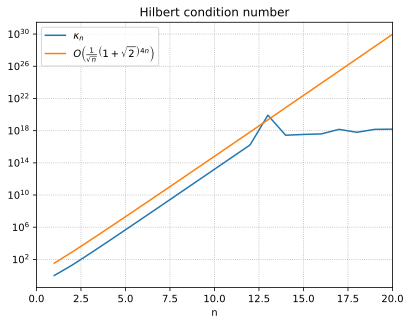

In [9]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

def plot_hilbert_cond(n_max):
    ns = np.arange(1, n_max + 1)
    # Estimated growth: 
    estimated_condition_numbers = []
    for n in ns:
        Hilbert_matrix = 1 / (np.arange(1, n + 1) + np.arange(0, n)[:, np.newaxis]) # I automatically substracted 1 from second j index(with newaxis it will be coubted as column index) array to apply [:, np.newaxis]
        estimated_condition_number = np.linalg.cond(Hilbert_matrix)
        estimated_condition_numbers.append(estimated_condition_number)
    # Theoretical growth: also we can use np.linalg.cond(Hilbert_matrix) for each n in ns, and add results to created list
    theoretical_condition_numbers = 1 / np.sqrt(ns) * (1 + np.sqrt(2))**(4 * ns)
    
    plt.plot(ns, estimated_condition_numbers, label=r'$\kappa_n$') # estimated_condition_number 
    plt.plot(ns, theoretical_condition_numbers, label=r'$O\left(\frac{1}{\sqrt{n}}\left(1 + \sqrt{2}\right)^{4n}\right)$', linestyle='solid')

    plt.xlim(0, n_max)
    plt.yscale('log')  # Log scale for better visualization
    plt.title("Hilbert condition number")
    plt.legend()
    plt.xlabel("n")
    plt.grid(ls=":")
    plt.show()

plot_hilbert_cond(20)

What can you say looking at these graphs? Does the estimation for $\kappa_n$ seem correct or not? Estimated and theoretical growths are slightly different. 

## Task 2.4 (1 point)

Let $\boldsymbol u_1, \ldots, \boldsymbol u_r \in\mathbb R^{n}$ be an orthonormal system of vectors, $1 \leqslant r \leqslant n$, and

$$
\boldsymbol A = \sum\limits_{i=1}^r \sigma_i \boldsymbol u_i \boldsymbol u_i^{\mathsf T}, \quad \sigma_1 \geqslant \sigma_2 \geqslant \ldots \geqslant \sigma_r > 0.
$$

Show that $\boldsymbol A$ is symmetric and semi-positive definite, i.e., $\boldsymbol A^\mathsf{T} =\boldsymbol A$ and $\boldsymbol x^\mathsf{T}\boldsymbol{Ax} \geqslant 0$ for all $\boldsymbol x \in\mathbb R^n$. Under which condition $\boldsymbol A$ is positive definite?

### My solution:
$$
\boldsymbol A^{\mathsf T} = (\sum\limits_{i=1}^r \sigma_i \boldsymbol u_i \boldsymbol u_i^{\mathsf T})^{\mathsf T} = \sum\limits_{i=1}^r \sigma_i \boldsymbol u_i^{\mathsf T} \boldsymbol u_i = \sum\limits_{i=1}^r \sigma_i \boldsymbol u_i \boldsymbol u_i^{\mathsf T} = \boldsymbol A
$$
Thus, $\boldsymbol A^{\mathsf T} = \boldsymbol A$, and $\boldsymbol A$ is symmetric. <br>
To matrix be semi-positive definite: $\boldsymbol x^\mathsf{T}\boldsymbol{Ax} \geqslant 0$ for all $\boldsymbol x \in\mathbb R^n,\quad \sigma_1 \geqslant \sigma_2 \geqslant \ldots \geqslant \sigma_r > 0.$ Matrix is positive definite iff all singular values are positive. 

$$
\boldsymbol x^{\mathsf T}\boldsymbol A\boldsymbol x = \boldsymbol x^{\mathsf T}\sum\limits_{i=1}^r \sigma_i \boldsymbol u_i \boldsymbol u_i^{\mathsf T}\boldsymbol x = \sum\limits_{i=1}^r\sigma_i\boldsymbol x^{\mathsf T}\boldsymbol u_i\boldsymbol u_i^{\mathsf T}\boldsymbol x = \sum\limits_{i=1}^r\sigma_i(\boldsymbol u_i^{\mathsf T}\boldsymbol x)^{2}
$$
We can do that, since
$$
\boldsymbol x^{\mathsf T}\boldsymbol u_i = \boldsymbol u_i^{\mathsf T}\boldsymbol x = \boldsymbol x \boldsymbol u_i^{\mathsf T}
$$
Since, $\sigma_i > 0$ and $(\boldsymbol u_i^{\mathsf T}\boldsymbol x)^{2} \geq 0$ for all $i$, the sum is non-negative, this implies that, $\boldsymbol A$ is semi-definite.

## Task 2.5 (1 point)

Take a **colored** image which has at least $300$ pixels in both width and height and apply SVD like it is done {ref}`here <image-svd>`. Display several low-rank approximations to your image and plot the graph of errors $\Vert \boldsymbol A - \hat{\boldsymbol A}_r\Vert_F$ for all possible $r$.

An image can be read, for example, by `plt.imread`:

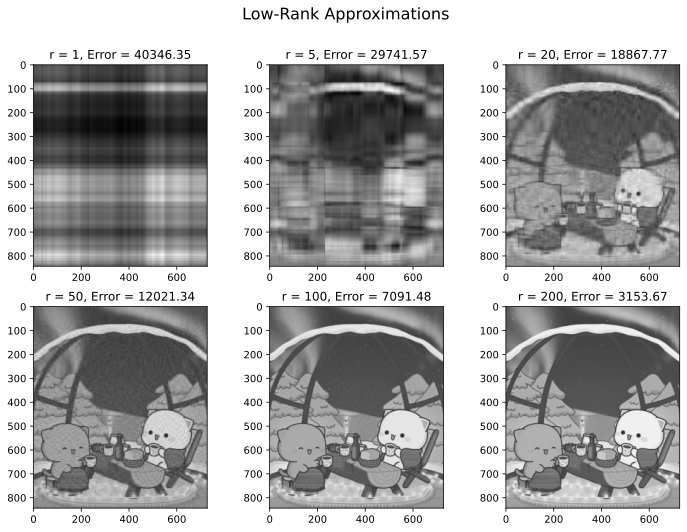

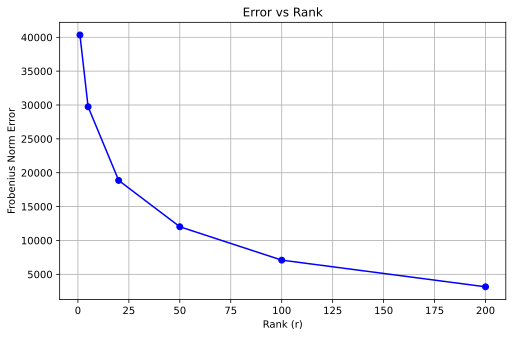

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image that is colored
X = cv2.imread("peach_and_goma_northern_lights.jpg")

# Convert the image to grayscale
X_gray = cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)

# Perform SVD on the grayscale image
U, Sigma, Vt = np.linalg.svd(X_gray, full_matrices=False)

# Function to calculate Frobenius norm of the difference between A and A_hat_r
def calculate_error(A, A_hat_r):
    return np.linalg.norm(A - A_hat_r, ord='fro')

# Function to reconstruct matrix A using the first r singular values
def reconstruct_matrix(U, Sigma, Vt, r):
    return U[:, :r] @ np.diag(Sigma[:r]) @ Vt[:r, :]

# Display several low-rank approximations
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Low-Rank Approximations', fontsize=16)

# Plot the original grayscale image
axes[0, 0].imshow(X_gray, cmap='gray')
axes[0, 0].set_title('Original Grayscale Image')

# Plot low-rank approximations
r_values = [1, 5, 20, 50, 100, 200]
errors = []

for i, r in enumerate(r_values, 1):
    # Reconstruct the image using the first r singular values
    X_hat_r = reconstruct_matrix(U, Sigma, Vt, r)
    
    # Calculate Frobenius norm of the difference
    error = calculate_error(X_gray, X_hat_r)
    errors.append(error)
    
    # Plot the low-rank approximation
    row_index = (i - 1) // 3  # Adjusted row index
    col_index = (i - 1) % 3   # Adjusted column index

    axes[row_index, col_index].imshow(X_hat_r, cmap='gray')
    axes[row_index, col_index].set_title(f'r = {r}, Error = {error:.2f}')
    
# Plot the graph of errors
plt.figure(figsize=(8, 5))
plt.plot(r_values, errors, marker='o', linestyle='-', color='b')
plt.title('Error vs Rank')
plt.xlabel('Rank (r)')
plt.ylabel('Frobenius Norm Error')
plt.grid(True)

# Show the plots
plt.show()



**Do not forget to attach your image to your submission!**